Packages

In [1]:
import numpy as np
from sklearn import svm

import utils.get_data as data
import utils.plots as plots

from IPython.display import Image, display, HTML

# COVARIATE SHIFT 

PROBLEM FORMULATION

Under the covariate shift assumption of $P(y\,|\,x)$ is unchanged for both training and test, but $P(x)$ is different. A problem that arises from the change of the distribution of the features is that the empirical risk will no longer be an unbiased estimation for the risk in the test, and even potentially harmful to train a model naively on the training set.

$\hat{R}_{train} = \frac{1}{n} \sum_{i=1}^n l\left(x_i, y_i, f(x_i, \theta) \right) \xrightarrow[]{p} R_{train} \neq R_{test}$

Using that $\mathbb{E}_{(x,y)\sim test}\left[l\left(x, y, f(x, \theta) \right)\right] = \mathbb{E}_{(x,y)\sim train}\left[ \frac{p_{test}(x,y)}{p_{train}(x,y)} l\left(x, y, f(x, \theta) \right)\right]$ 

a solution when the distributions overlap, explored by Sugiyama et al (2007), is to use different weights for the observations in the training data to account for the difference in the distributions, $w_i = \frac{p_{test}(x_i)}{p_{train}(x_i)}$.

Then by minimizing the Importance Weighted Risk one can make better use of the training set for the task of building a predictor for the test set, 

$\hat{R}_{w} = \frac{1}{n} \sum_{i=1}^n w_i l\left(x_i, y_i, f(x_i, \theta) \right) = \frac{1}{n} \sum_{i=1}^n \frac{p_{test}(x_i,y_i)}{p_{train}(x_i, y_i)} l\left(x_i, y_i, f(x_i, \theta) \right)$

<br>
TWO STAGES OPTIMIZATION

* Compute $\hat{p}_{test}(x,y)$ and $\hat{p}_{train}(x,y)$ using direct density estimation or propensity scores.
* Minimize the importance weighted empirical risk.

INTEGRATED OPTIMIZATION
* Solve at the same time, propensity score parameters and classification problem.


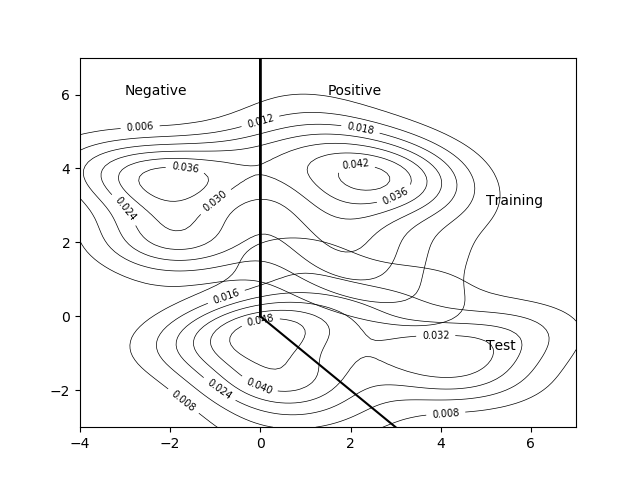

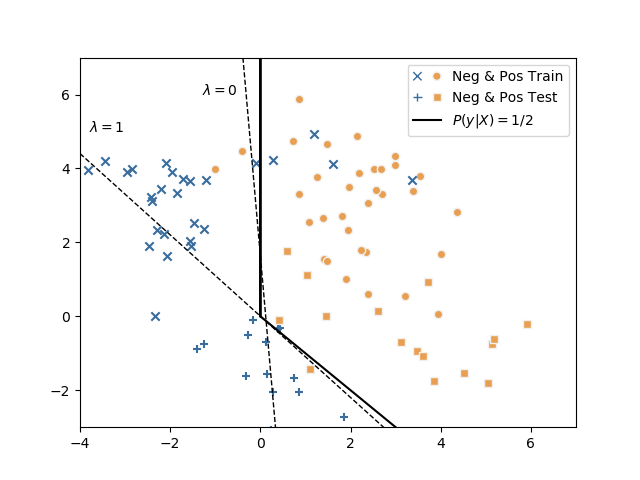

In [2]:
x0 = Image(filename='images/sugiyama1.png') 
x1 = Image(filename='images/sugiyama2.png') 
display(x0, x1)

# EXTENSION 1 
PROBLEM FORMULATION

Extending the covariate shift problem to a family of distributions, where one would need to have different models for each distribution, one can extend.

$\mathbb{E}_{(x,y)\sim task_k }\left[l\left(x, y, f(x, \theta) \right)\right] = \mathbb{E}_{(x,y)\sim train}\left[ \frac{p_{task_k}(x,y)}{p_{train}(x,y)} l\left(x, y, f(x, \theta) \right)\right] = \mathbb{E}_{(x,y)\sim train}\left[ \frac{p(x,y|\,task_{k})}{\sum_{k'} p(task_{k'}) p(x,y|\,task_{k'})} l\left(x, y, f(x, \theta) \right)\right]$

If the distributions are separated in advance one can address the problem by:

TWO STAGES OPTIMIZATION

* Compute  $\hat{p}_{task_k}(x,y)$ and $\hat{p}_{train}(x,y)$  using direct density estimation or propensity scores (one vs all).

    * $r_{task_k}(x,y) = \frac{p(x,y|\, task_k )}{\sum_{k'} p(task_{k'}) p(x,y|\,task_{k'})} = \frac{p(task_k|\, x,y)}{p(task_k)}$

* Minimize the importance weighted empirical risk.

INTEGRATED OPTIMIZATION

* Solve at the same time, propensity score parameters and classification problem.


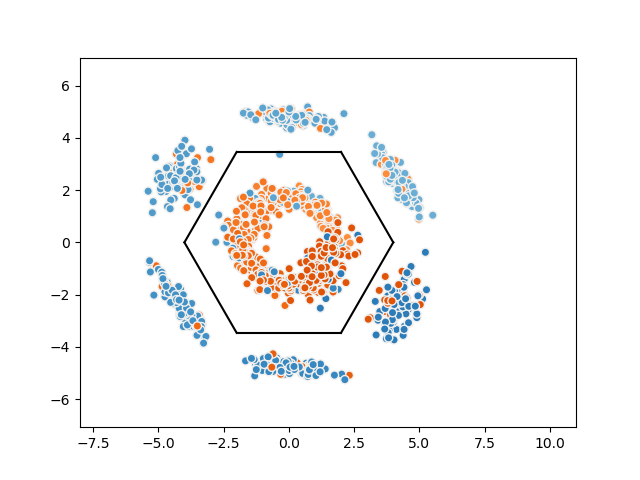

In [3]:
x0 = Image(filename='images/experiment2.png') 
display(x0)

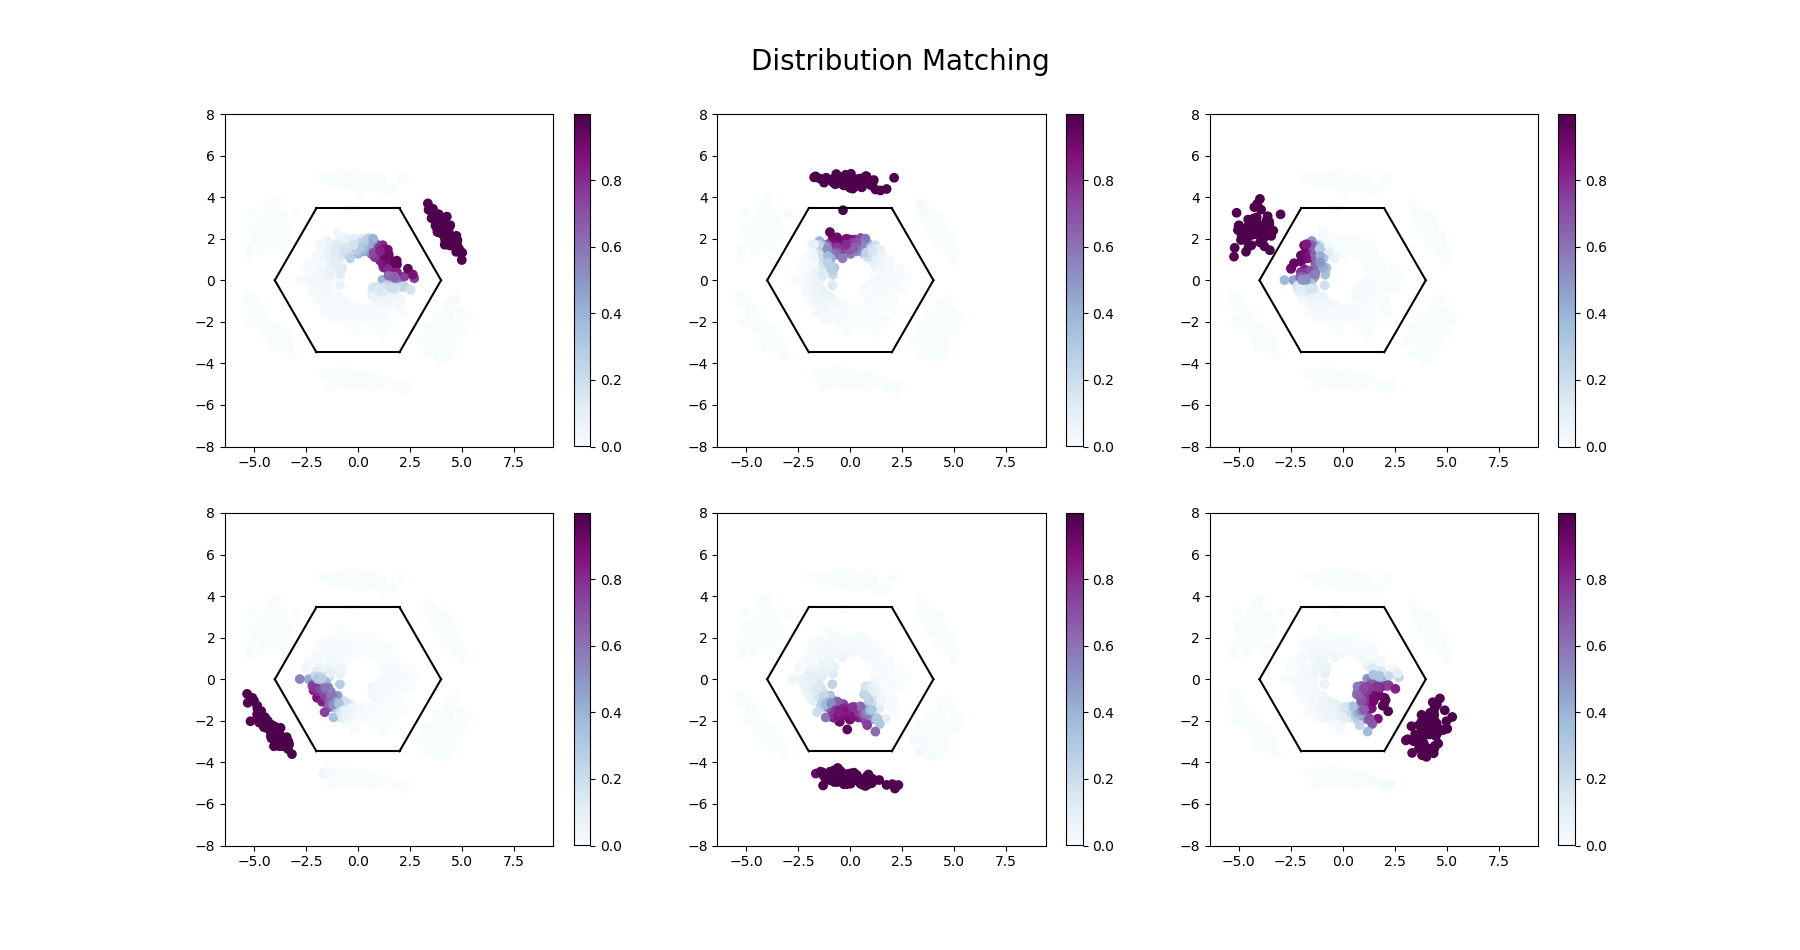

In [5]:
x0 = Image(filename='images/experiment_1stage.png') 
display(x0)

# EXTENSION 2
Unsupervised definition of the tasks